In [1]:
from urllib.request import urlretrieve
import os
from pathlib import Path
import kaggle
import pandas as pd
import numpy as np

In [ ]:
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json

# api_token = {"username":"username","key":"api-key"}

# import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

In [7]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files("sachinpatel21/az-handwritten-alphabets-in-csv-format", path='../data/', unzip=True)

In [2]:
df = pd.read_csv("../data/A_Z Handwritten Data.csv")

In [3]:
x = df.iloc[0]

In [4]:
import matplotlib.pyplot as plt

In [5]:
img = x[:-1].values.reshape(28,28)

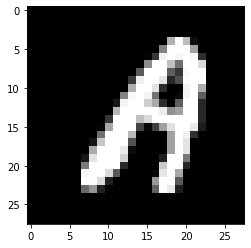

In [6]:
plt.imshow(img, cmap="gray")

In [7]:
import matplotlib.pyplot as plt

In [8]:
img = x[:-1].values.reshape(28,28)

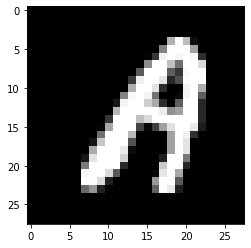

In [9]:
plt.imshow(img, cmap="gray")

In [10]:
X, y = df.drop(columns=[df.columns[0]]).values, df[df.columns[0]].values

In [11]:
X.shape

(372450, 784)

In [12]:
y.shape

(372450,)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)

In [15]:
for train, test in sss.split(X, y):
    x_train, x_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

In [16]:
x_train.shape

(279337, 784)

In [17]:
x_test.shape

(93113, 784)

In [18]:
y_train.shape

(279337,)

In [19]:
y_test.shape

(93113,)

# Model Creation

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
rf.score(x_test, y_test)

0.986059948664526

In [34]:
rf.score(x_train, y_train)

1.0

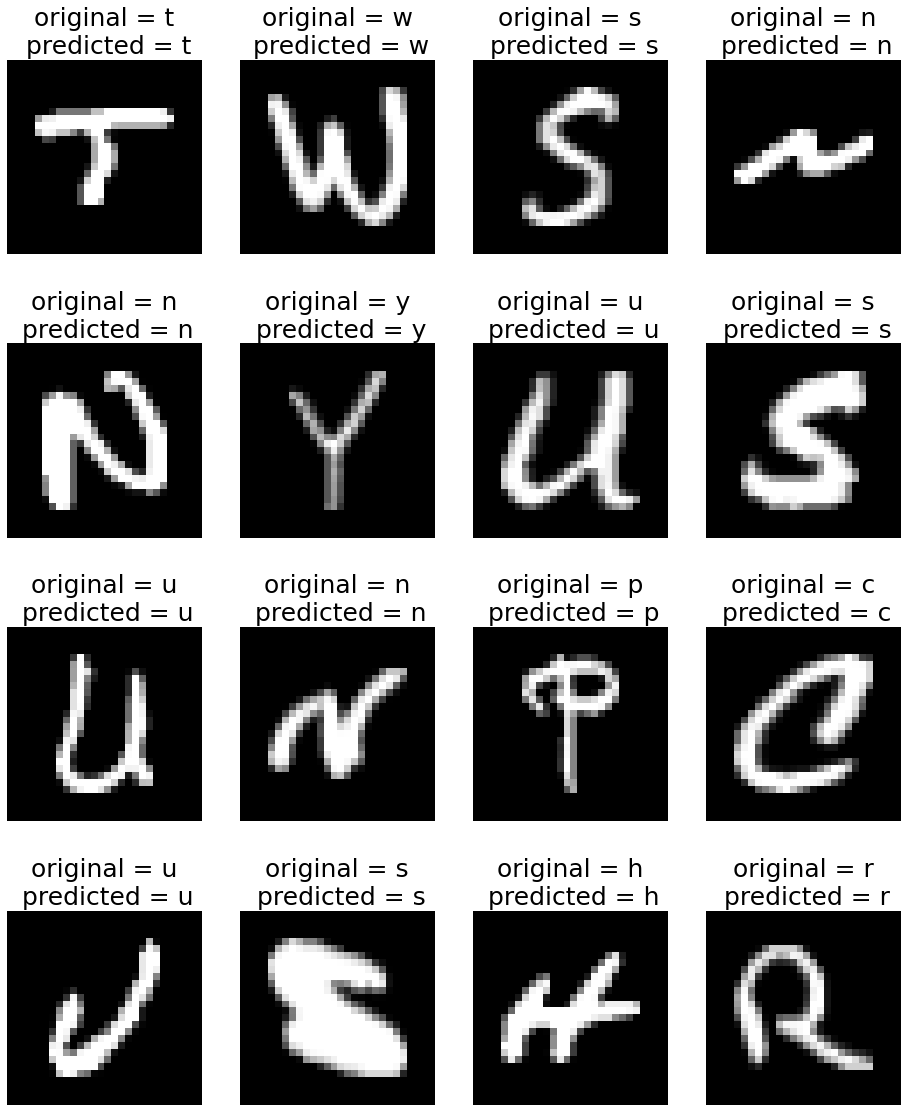

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,4, figsize=(16,20))
count = 0
alphabets = [chr(i+ord('a')) for i in range(26)]
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(x_test[count].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"original = {alphabets[y_test[count]]}\n predicted = {alphabets[rf.predict([x_test[count]])[0]]}", fontsize=25)
        ax[i,j].axis("off")
        count += 1

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = rf.predict(x_test)
confusion_matrix(y_pred, y_test)

In [ ]:
print(classification_report(y_pred, y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_tf = scaler.fit_transform(x_train)
x_test_tf = scaler.transform(x_test)

In [ ]:
svc = LogisticRegression()
svc.fit(x_train_tf, y_train)

In [ ]:
svc.score(x_test_tf, y_test)

In [ ]:
svc.score(x_train_tf, y_train)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,4, figsize=(16,20))
count = 0
alphabets = [chr(i+ord('a')) for i in range(26)]
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(x_test[count].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"original = {alphabets[y_test[count]]}\n predicted = {alphabets[svc.predict([x_test_tf[count]])[0]]}", fontsize=25)
        ax[i,j].axis("off")
        count += 1

In [ ]:
y_pred = svc.predict(x_test_tf)
print(classification_report(y_pred, y_test))

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
y_pred = rf.predict(x_test)
confusion_matrix(y_pred, y_test)

array([[ 3438,    12,     0,     2,     0,     0,     8,    18,     0,
            0,     2,     0,    25,     7,     0,     5,     0,    23,
            2,     6,     0,     0,     0,     5,     0,     0],
       [    3,  2070,     2,     5,     6,     0,     7,     2,     0,
            0,     2,     0,     1,     0,     6,     0,     2,     4,
            1,     0,     0,     0,     0,     0,     0,     6],
       [    0,     1,  5824,     0,    23,     1,     6,     0,     0,
            0,     4,     8,     0,     0,     5,     0,     0,     8,
            2,     2,     1,     0,     0,     0,     0,     1],
       [    1,    12,     0,  2425,     1,     0,     0,     0,     0,
            4,     0,     0,     1,     4,    24,     6,     0,     0,
            0,     0,     5,     0,     1,     0,     2,     1],
       [    0,     4,     3,     0,  2801,     5,     0,     0,     1,
            0,     1,     0,     0,     2,     0,     0,     0,     5,
            2,     0,     2,  

In [40]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3553
           1       0.96      0.98      0.97      2117
           2       1.00      0.99      0.99      5886
           3       0.96      0.98      0.97      2487
           4       0.98      0.99      0.98      2835
           5       0.93      1.00      0.96       270
           6       0.96      0.99      0.97      1394
           7       0.97      0.98      0.97      1782
           8       0.95      1.00      0.98       267
           9       0.97      0.99      0.98      2080
          10       0.96      0.97      0.97      1386
          11       0.99      0.99      0.99      2909
          12       0.97      0.99      0.98      3031
          13       0.99      0.98      0.98      4810
          14       1.00      0.99      0.99     14614
          15       0.99      0.99      0.99      4874
          16       0.94      0.98      0.96      1396
          17       0.98    

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
x_train_tf = scaler.fit_transform(x_train)
x_test_tf = scaler.transform(x_test)

In [28]:
svc = LogisticRegression()
svc.fit(x_train_tf, y_train)

C:\Users\sujan\Desktop\Test Programs\Projects\Handwritten-Character-Recognition\env\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
svc.score(x_test_tf, y_test)

0.8793938547786023

In [30]:
svc.score(x_train_tf, y_train)

0.8870002899723274

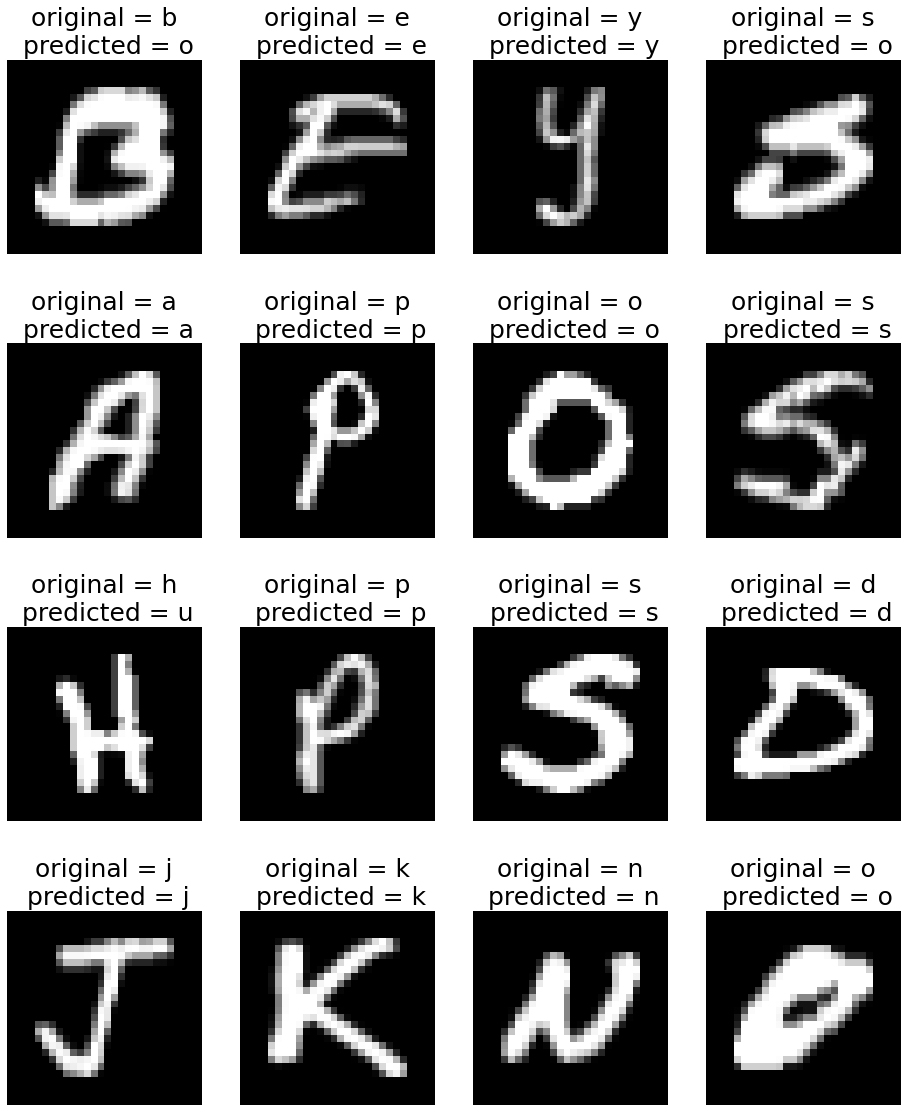

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,4, figsize=(16,20))
count = 0
alphabets = [chr(i+ord('a')) for i in range(26)]
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(x_test[count].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"original = {alphabets[y_test[count]]}\n predicted = {alphabets[svc.predict([x_test_tf[count]])[0]]}", fontsize=25)
        ax[i,j].axis("off")
        count += 1

In [32]:
y_pred = svc.predict(x_test_tf)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3534
           1       0.77      0.86      0.81      1958
           2       0.89      0.90      0.89      5823
           3       0.78      0.83      0.80      2359
           4       0.80      0.83      0.82      2764
           5       0.82      0.89      0.86       268
           6       0.78      0.84      0.81      1328
           7       0.72      0.77      0.75      1673
           8       0.78      0.94      0.85       234
           9       0.80      0.80      0.80      2137
          10       0.76      0.76      0.76      1398
          11       0.94      0.91      0.92      3019
          12       0.88      0.87      0.88      3127
          13       0.82      0.81      0.81      4854
          14       0.96      0.93      0.95     14818
          15       0.92      0.90      0.91      4994
          16       0.77      0.83      0.80      1336
          17       0.79    